In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
my_data = pd.read_csv(r"F:\Data_Science_Jupyter_Files\drug200.csv")

In [4]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Analysis and pre-processing

In [11]:
my_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### This tells us that 4 out of the 6 features of this dataset are categorical, which will have to be converted into numerical ones to be used for modeling. For this, we can make use of LabelEncoder from the Scikit-Learn library.

In [12]:
label_encoder = LabelEncoder()
my_data["Sex"] = label_encoder.fit_transform(my_data["Sex"])
my_data["BP"] = label_encoder.fit_transform(my_data["BP"])
my_data["Cholesterol"] = label_encoder.fit_transform(my_data["Cholesterol"])
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [13]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


#### To evaluate the correlation of the target variable with the input features, it will be convenient to map the different drugs to a numerical value.

In [14]:
custom_map = {"drugA":0, "drugB":1, "drugC":2, "drugX":3, "drugY":4}
my_data["Drug_num"] = my_data["Drug"].map(custom_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


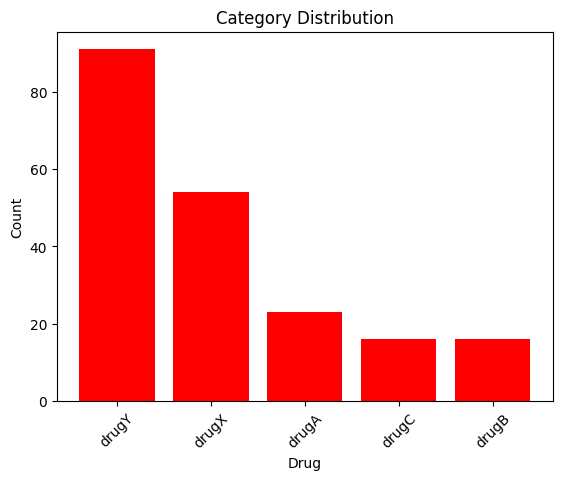

In [31]:
# We can also understand the distribution of the dataset by plotting the count of the records with each drug recommendation.

category_counts = my_data["Drug"].value_counts()

plt.bar(category_counts.index, category_counts.values, color="red")
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

#### Use the corr() function to find the correlation of the input variables with the target variable.

In [20]:
my_data.drop("Drug", axis=1).corr()["Drug_num"]

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

### Modeling

#### For modeling this dataset with a Decision tree classifier, we first split the dataset into training and testing subsets. For this, we separate the target variable from the input variables.

In [22]:
X = my_data.drop(["Drug", "Drug_num"], axis=1)
y = my_data["Drug"]

#### Now, use the train_test_split() function to separate the training data from the testing data. We can make use of 30% of the data for testing and the rest for training the Decision tree.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

#### Now define the Decision tree classifier as drugTree and train it with the training data.

In [24]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [25]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluation

In [26]:
tree_predictions = drugTree.predict(X_test)

In [28]:
# We can now check the accuracy of our model by using the accuracy metric.
print("Decision Trees's Accuracy:", metrics.accuracy_score(y_test, tree_predictions)*100)

Decision Trees's Accuracy: 98.33333333333333


### Visualize the tree

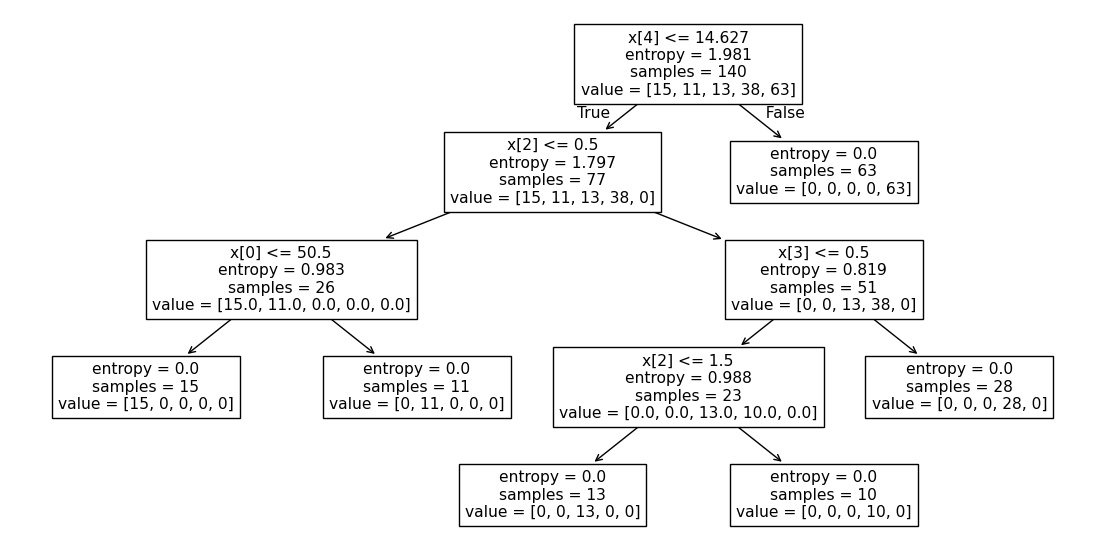

In [30]:
# To understand the classification criteria derived by the Decision Tree, we may generate the tree plot.
plt.figure(figsize=(14, 7))
plot_tree(drugTree)
plt.show()